In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=([32, 32, 3])),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [10]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3904 - loss: 1.6760
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.6026 - loss: 1.1250
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - accuracy: 0.6552 - loss: 0.9912
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.6871 - loss: 0.8955
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7131 - loss: 0.8234
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7351 - loss: 0.7549
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.7546 - loss: 0.7045
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7756 - loss: 0.6497
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7848 - loss: 0.6068
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8023 - loss: 0.5610
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8153 - loss: 0.5229
Epoch 12

In [20]:
cnn.save('Image_classify.keras')


In [21]:
y_pred_probabilities = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.68      0.69      1000
  automobile       0.79      0.76      0.77      1000
        bird       0.58      0.55      0.56      1000
         cat       0.47      0.48      0.47      1000
        deer       0.60      0.59      0.59      1000
         dog       0.62      0.49      0.55      1000
        frog       0.69      0.78      0.73      1000
       horse       0.66      0.73      0.70      1000
        ship       0.76      0.81      0.78      1000
       truck       0.73      0.76      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



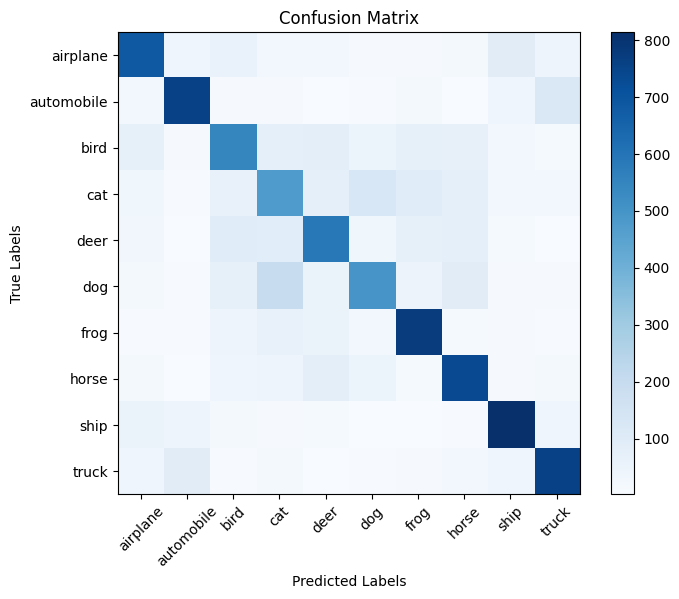

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(10), labels=classes, rotation=45)
plt.yticks(ticks=np.arange(10), labels=classes)
plt.show()


In [24]:
# Define the training fractions you want to experiment with
fractions = [0.9, 0.8, 0.7, 0.6, 0.5]

In [25]:
# Dictionary to store accuracy for each fraction
fraction_accuracy = {}


In [26]:
# Loop through each fraction
for frac in fractions:
    print(f"\nTraining with {int(frac*100)}% of the training data...")




Training with 90% of the training data...

Training with 80% of the training data...

Training with 70% of the training data...

Training with 60% of the training data...

Training with 50% of the training data...


In [27]:
# Recreate the train generator to reset the training data
train_generator = X_train, y_train,  # Fixed the path separator to avoid the SyntaxWarning
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training')

IndentationError: unexpected indent (4186360386.py, line 3)

In [28]:
# Number of steps per epoch based on the fraction of the dataset
    total_train_images = train_generator.samples
    steps_per_epoch = int(frac * total_train_images / train_generator.batch_size)


IndentationError: unexpected indent (3501731729.py, line 2)

In [29]:
 # Compile the model again (reset the model for new training)
    cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


IndentationError: unexpected indent (1924654130.py, line 2)

In [32]:
# Train the model using only a fraction of the data
history = cnn.fit(
        x=train_generator,
        validation_data=validation_generator,
        steps_per_epoch=steps_per_epoch,  # Adjust the steps to control training data used
        epochs=30,
        callbacks=[early_stopping],
        verbose=1
    )

NameError: name 'train_generator' is not defined

In [ ]:
# Evaluate on the test set and store the accuracy
    test_loss, test_accuracy = cnn.evaluate(X_test)
    fraction_accuracy[frac] = test_accuracy
    print(f"Test Accuracy for {int(frac*100)}% data: {test_accuracy:.4f}")

In [ ]:
# Display the accuracy for each fraction
print("\nSummary of accuracies for different training data fractions:")
for frac, accuracy in fraction_accuracy.items():
    print(f"{int(frac*100)}% of data -> Test Accuracy: {accuracy:.4f}")

In [30]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x500 with 0 Axes>